In [97]:
import numpy as np
import gzip
import pickle
import sys
import copy
import os.path
from copy import deepcopy

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

import tensorflow as tf

# Split CL1

In [98]:
with open('../../continual_learning_baselines/outputs/online_ewc_MLP5SL_l1_split_cl1.pkl', 'rb') as input_file:
    d_ewc_h5 = pickle.load(input_file)
with open('../../continual_learning_baselines/outputs/online_ewc_MLP50SL_l1_split_cl1.pkl', 'rb') as input_file:
    d_ewc_h50 = pickle.load(input_file)
with open('../../continual_learning_baselines/outputs/online_ewc_MLP100SL_l1_split_cl1.pkl', 'rb') as input_file:
    d_ewc_h100 = pickle.load(input_file)  

In [99]:
with open('results/split_mnist_res5_split_normal_l1_mh.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [100]:
reg = 100.0 # 1.0, 10.0, 100.0
ibp = d['vcl_ibp']
ewc_h5 = d_ewc_h5['accs'][reg] / 100.0
ewc_h50 = d_ewc_h50['accs'][reg] / 100.0
ewc_h100 = d_ewc_h100['accs'][reg] / 100.0
_ewc_h5 = np.mean(d_ewc_h5['accs'][reg], 0) / 100.0
_ewc_h50 = np.mean(d_ewc_h50['accs'][reg], 0) / 100.0
_ewc_h100 = np.mean(d_ewc_h100['accs'][reg], 0) / 100.0
_ibp = np.nanmean(ibp, 0)
__ewc_h5 = np.nanmean(d_ewc_h5['accs'][reg], (0, 1)) / 100.0
__ewc_h50 = np.nanmean(d_ewc_h50['accs'][reg], (0, 1)) / 100.0
__ewc_h100 = np.nanmean(d_ewc_h100['accs'][reg], (0, 1)) / 100.0
__ibp = np.nanmean(ibp, (0,1))

/nfs/home/samuelk/anaconda2/envs/tf-gpu-cuda8/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


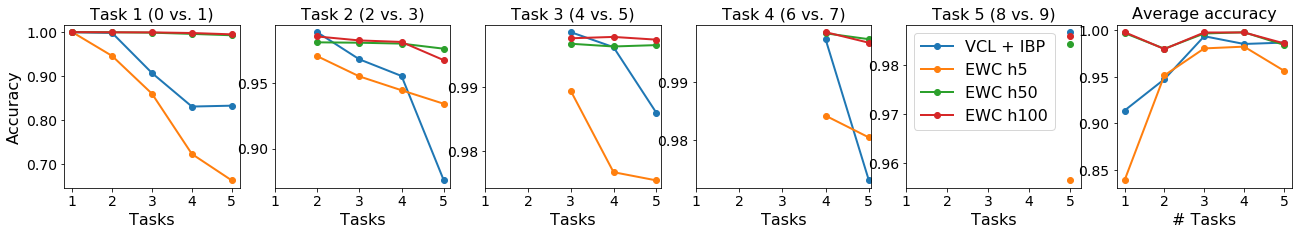

In [101]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

titles = {0: "Task 1 (0 vs. 1)",
          1: "Task 2 (2 vs. 3)",
          2: "Task 3 (4 vs. 5)",
          3: "Task 4 (6 vs. 7)",
          4: "Task 5 (8 vs. 9)"}
no_tasks=5
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_ibp[:, i]))+1, _ibp[:, i], label='VCL + IBP', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_ewc_h5[:, i]))+1, _ewc_h5[:, i], label='EWC h5', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_ewc_h50[:, i]))+1, _ewc_h50[:, i], label='EWC h50', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_ewc_h100[:, i]))+1, _ewc_h100[:, i], label='EWC h100', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_ibp[:,i])+1))
    ax[i].set_xlabel('Tasks', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 4:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[5].plot(np.arange(len(__ibp))+1, __ibp, label='VCL + IBP', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ewc_h5))+1, __ewc_h5, label='EWC h5', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ewc_h50))+1, __ewc_h50, label='EWC h50', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ewc_h100))+1, __ewc_h100, label='EWC h100', marker='o', linewidth=lw)
ax[5].set_xticks(range(1, len(__ibp)+1))
ax[5].set_title('Average accuracy', fontsize=legend_size)
ax[5].set_xlabel('# Tasks', fontsize=legend_size)
ax[5].tick_params(labelsize=tick_size)
ax[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
#plt.savefig("plots/hibp_vs_ewc_normal_all.pdf", bbox_inches='tight')
fig.show()

In [102]:
print("Overall accuracies EWC h5: {0} pm {1}".format(np.nanmean(_ewc_h5), np.nanmean(np.nanstd(ewc_h5, 0))))
print("Overall accuracies EWC h50: {0} pm {1}".format(np.nanmean(_ewc_h50), np.nanmean(np.nanstd(ewc_h50, 0))))
print("Overall accuracies EWC h100: {0} pm {1}".format(np.nanmean(_ewc_h100), np.nanmean(np.nanstd(ewc_h100, 0))))

Overall accuracies EWC h5: 0.9240078873333848 pm 0.03831238684971475
Overall accuracies EWC h50: 0.9916336673676331 pm 0.0018675963197087365
Overall accuracies EWC h100: 0.9921518615450904 pm 0.0027554335299359214


# CL2

In [103]:
with open('../../continual_learning_baselines/outputs/online_ewc_MLP5SL_l1_split_cl2.pkl', 'rb') as input_file:
    d_ewc_h5 = pickle.load(input_file)
with open('../../continual_learning_baselines/outputs/online_ewc_MLP50SL_l1_split_cl2.pkl', 'rb') as input_file:
    d_ewc_h50 = pickle.load(input_file)
with open('../../continual_learning_baselines/outputs/online_ewc_MLP100SL_l1_split_cl2.pkl', 'rb') as input_file:
    d_ewc_h100 = pickle.load(input_file)

In [104]:
with open('results/split_mnist_res5_split_normal_l1_sh.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [105]:
reg = 100.0 # 1.0, 10.0, 100.0
ibp = d['vcl_ibp']
ewc_h5 = d_ewc_h5['accs'][reg] / 100.0
ewc_h50 = d_ewc_h50['accs'][reg] / 100.0
ewc_h100 = d_ewc_h100['accs'][reg] / 100.0
_ewc_h5 = np.mean(d_ewc_h5['accs'][reg], 0) / 100.0
_ewc_h50 = np.mean(d_ewc_h50['accs'][reg], 0) / 100.0
_ewc_h100 = np.mean(d_ewc_h100['accs'][reg], 0) / 100.0
_ibp = np.nanmean(ibp, 0)
__ewc_h5 = np.nanmean(d_ewc_h5['accs'][reg], (0, 1)) / 100.0
__ewc_h50 = np.nanmean(d_ewc_h50['accs'][reg], (0, 1)) / 100.0
__ewc_h100 = np.nanmean(d_ewc_h100['accs'][reg], (0, 1)) / 100.0
__ibp = np.nanmean(ibp, (0,1))

/nfs/home/samuelk/anaconda2/envs/tf-gpu-cuda8/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


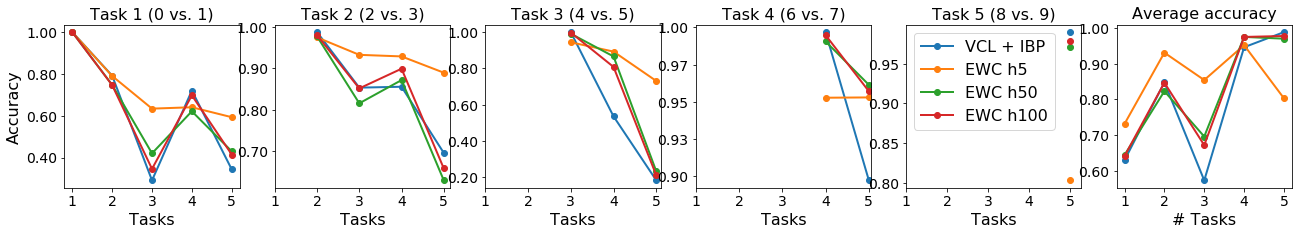

In [106]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

titles = {0: "Task 1 (0 vs. 1)",
          1: "Task 2 (2 vs. 3)",
          2: "Task 3 (4 vs. 5)",
          3: "Task 4 (6 vs. 7)",
          4: "Task 5 (8 vs. 9)"}
no_tasks=5
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_ibp[:, i]))+1, _ibp[:, i], label='VCL + IBP', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_ewc_h5[:, i]))+1, _ewc_h5[:, i], label='EWC h5', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_ewc_h50[:, i]))+1, _ewc_h50[:, i], label='EWC h50', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_ewc_h100[:, i]))+1, _ewc_h100[:, i], label='EWC h100', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_ibp[:,i])+1))
    ax[i].set_xlabel('Tasks', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 4:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[5].plot(np.arange(len(__ibp))+1, __ibp, label='VCL + IBP', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ewc_h5))+1, __ewc_h5, label='EWC h5', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ewc_h50))+1, __ewc_h50, label='EWC h50', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ewc_h100))+1, __ewc_h100, label='EWC h100', marker='o', linewidth=lw)
ax[5].set_xticks(range(1, len(__ibp)+1))
ax[5].set_title('Average accuracy', fontsize=legend_size)
ax[5].set_xlabel('# Tasks', fontsize=legend_size)
ax[5].tick_params(labelsize=tick_size)
ax[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
#plt.savefig("plots/hibp_vs_ewc_normal_all.pdf", bbox_inches='tight')
fig.show()

In [107]:
print("Overall accuracies IBP : {0} pm {1}".format(np.nanmean(ibp), np.nanmean(np.nanstd(ibp, 0))))
print("Overall accuracies EWC h5: {0} pm {1}".format(np.nanmean(_ewc_h5), np.nanmean(np.nanstd(ewc_h5, 0))))
print("Overall accuracies EWC h50: {0} pm {1}".format(np.nanmean(_ewc_h50), np.nanmean(np.nanstd(ewc_h50, 0))))
print("Overall accuracies EWC h100: {0} pm {1}".format(np.nanmean(_ewc_h100), np.nanmean(np.nanstd(ewc_h100, 0))))

Overall accuracies IBP : 0.742464732180369 pm 0.018700345287763227
Overall accuracies EWC h5: 0.8437465025951776 pm 0.009076518697866387
Overall accuracies EWC h50: 0.7680375076560859 pm 0.011031111631362066
Overall accuracies EWC h100: 0.7690700280757227 pm 0.015330782114808837


# Split + noise 

## CL1

In [54]:
with open('../../continual_learning_baselines/outputs/online_ewc_MLP100_l1_split_mnsitr_cl1.pkl', 'rb') as input_file:
    d_ewc_h100_l2 = pickle.load(input_file)
with open('../../continual_learning_baselines/outputs/online_ewc_MLP5SL_l1_split_mnsitr_cl1.pkl', 'rb') as input_file:
    d_ewc_h5 = pickle.load(input_file)
with open('../../continual_learning_baselines/outputs/online_ewc_MLP50SL_l1_split_mnsitr_cl1.pkl', 'rb') as input_file:
    d_ewc_h50 = pickle.load(input_file)
with open('../../continual_learning_baselines/outputs/online_ewc_MLP100SL_l1_split_mnsitr_cl1.pkl', 'rb') as input_file:
    d_ewc_h100 = pickle.load(input_file)

In [55]:
with open('results/split_mnist_res5_random_mh.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [56]:
reg = 100.0 # 1.0, 10.0, 100.0
ibp = d['vcl_ibp']
ewc_h5 = d_ewc_h5['accs'][reg] / 100.0
ewc_h50 = d_ewc_h50['accs'][reg] / 100.0
ewc_h100 = d_ewc_h100['accs'][reg] / 100.0
_ewc_h5 = np.mean(d_ewc_h5['accs'][reg], 0) / 100.0
_ewc_h50 = np.mean(d_ewc_h50['accs'][reg], 0) / 100.0
_ewc_h100 = np.mean(d_ewc_h100['accs'][reg], 0) / 100.0
_ibp = np.nanmean(ibp, 0)
__ewc_h5 = np.nanmean(d_ewc_h5['accs'][reg], (0, 1)) / 100.0
__ewc_h50 = np.nanmean(d_ewc_h50['accs'][reg], (0, 1)) / 100.0
__ewc_h100 = np.nanmean(d_ewc_h100['accs'][reg], (0, 1)) / 100.0
__ibp = np.nanmean(ibp, (0,1))

/nfs/home/samuelk/anaconda2/envs/tf-gpu-cuda8/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


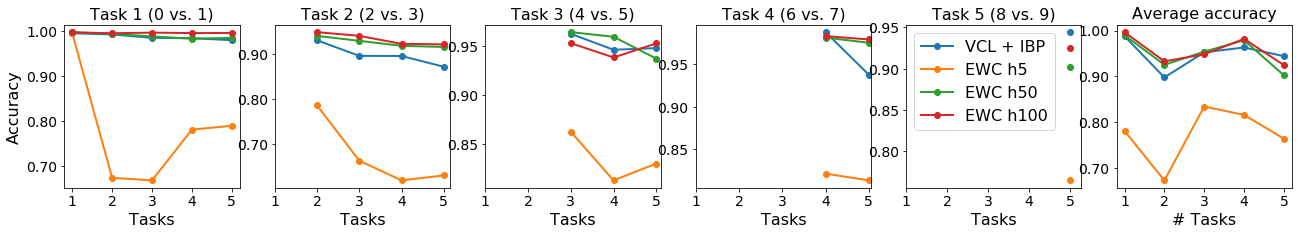

In [57]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

titles = {0: "Task 1 (0 vs. 1)",
          1: "Task 2 (2 vs. 3)",
          2: "Task 3 (4 vs. 5)",
          3: "Task 4 (6 vs. 7)",
          4: "Task 5 (8 vs. 9)"}
no_tasks=5
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_ibp[:, i]))+1, _ibp[:, i], label='VCL + IBP', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_ewc_h5[:, i]))+1, _ewc_h5[:, i], label='EWC h5', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_ewc_h50[:, i]))+1, _ewc_h50[:, i], label='EWC h50', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_ewc_h100[:, i]))+1, _ewc_h100[:, i], label='EWC h100', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_ibp[:,i])+1))
    ax[i].set_xlabel('Tasks', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 4:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[5].plot(np.arange(len(__ibp))+1, __ibp, label='VCL + IBP', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ewc_h5))+1, __ewc_h5, label='EWC h5', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ewc_h50))+1, __ewc_h50, label='EWC h50', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ewc_h100))+1, __ewc_h100, label='EWC h100', marker='o', linewidth=lw)
ax[5].set_xticks(range(1, len(__ibp)+1))
ax[5].set_title('Average accuracy', fontsize=legend_size)
ax[5].set_xlabel('# Tasks', fontsize=legend_size)
ax[5].tick_params(labelsize=tick_size)
ax[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
#plt.savefig("plots/hibp_vs_ewc_normal_all.pdf", bbox_inches='tight')
fig.show()

In [58]:
print("Overall accuracies IBP : {0} pm {1}".format(np.nanmean(ibp), np.nanmean(np.nanstd(ibp, 0))))
print("Overall accuracies EWC h5: {0} pm {1}".format(np.nanmean(_ewc_h5), np.nanmean(np.nanstd(ewc_h5, 0))))
print("Overall accuracies EWC h50: {0} pm {1}".format(np.nanmean(_ewc_h50), np.nanmean(np.nanstd(ewc_h50, 0))))
print("Overall accuracies EWC h100: {0} pm {1}".format(np.nanmean(_ewc_h100), np.nanmean(np.nanstd(ewc_h100, 0))))

Overall accuracies IBP : 0.9505302564897856 pm 0.010747197352811237
Overall accuracies EWC h5: 0.7667990914508523 pm 0.12357598825763934
Overall accuracies EWC h50: 0.9581743689104567 pm 0.01803459603950865
Overall accuracies EWC h100: 0.9630792851702491 pm 0.011841601391962832


In [60]:
np.nanmean(d_ewc_h100_l2['accs'][reg]) / 100

0.9530517910755171

## CL2

In [61]:
with open('../../continual_learning_baselines/outputs/online_ewc_MLP100_l1_split_mnistr_cl2.pkl', 'rb') as input_file:
    d_ewc_h100_l2 = pickle.load(input_file)
with open('../../continual_learning_baselines/outputs/online_ewc_MLP5SL_l1_split_mnistr_cl2.pkl', 'rb') as input_file:
    d_ewc_h5 = pickle.load(input_file)
with open('../../continual_learning_baselines/outputs/online_ewc_MLP50SL_l1_split_mnistr_cl2.pkl', 'rb') as input_file:
    d_ewc_h50 = pickle.load(input_file)
with open('../../continual_learning_baselines/outputs/online_ewc_MLP100SL_l1_split_mnistr_cl2.pkl', 'rb') as input_file:
    d_ewc_h100 = pickle.load(input_file)

In [62]:
with open('results/split_mnist_res5_ibp_rs_split_random_random_l1_rs_sh.pkl', 'rb') as input_file:
    d_rs = pickle.load(input_file)
d_rs.keys()

dict_keys(['vcl_ibp', 'uncerts_ibp', 'Z', 'opt_params'])

In [63]:
reg = 100.0 # 1.0, 10.0, 100.0
ibp = d_rs['vcl_ibp']
ewc_h5 = d_ewc_h5['accs'][reg] / 100.0
ewc_h50 = d_ewc_h50['accs'][reg] / 100.0
ewc_h100 = d_ewc_h100['accs'][reg] / 100.0
_ewc_h5 = np.mean(d_ewc_h5['accs'][reg], 0) / 100.0
_ewc_h50 = np.mean(d_ewc_h50['accs'][reg], 0) / 100.0
_ewc_h100 = np.mean(d_ewc_h100['accs'][reg], 0) / 100.0
_ibp = np.nanmean(ibp, 0)
__ewc_h5 = np.nanmean(d_ewc_h5['accs'][reg], (0, 1)) / 100.0
__ewc_h50 = np.nanmean(d_ewc_h50['accs'][reg], (0, 1)) / 100.0
__ewc_h100 = np.nanmean(d_ewc_h100['accs'][reg], (0, 1)) / 100.0
__ibp = np.nanmean(ibp, (0,1))

/nfs/home/samuelk/anaconda2/envs/tf-gpu-cuda8/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


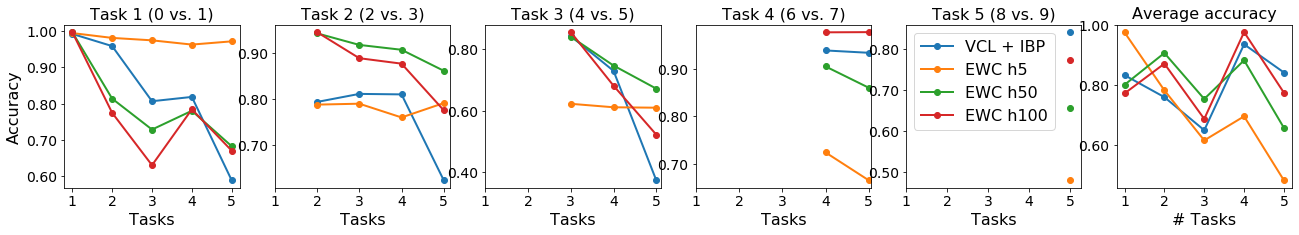

In [64]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

titles = {0: "Task 1 (0 vs. 1)",
          1: "Task 2 (2 vs. 3)",
          2: "Task 3 (4 vs. 5)",
          3: "Task 4 (6 vs. 7)",
          4: "Task 5 (8 vs. 9)"}
no_tasks=5
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_ibp[:, i]))+1, _ibp[:, i], label='VCL + IBP', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_ewc_h5[:, i]))+1, _ewc_h5[:, i], label='EWC h5', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_ewc_h50[:, i]))+1, _ewc_h50[:, i], label='EWC h50', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_ewc_h100[:, i]))+1, _ewc_h100[:, i], label='EWC h100', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_ibp[:,i])+1))
    ax[i].set_xlabel('Tasks', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 4:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[5].plot(np.arange(len(__ibp))+1, __ibp, label='VCL + IBP', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ewc_h5))+1, __ewc_h5, label='EWC h5', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ewc_h50))+1, __ewc_h50, label='EWC h50', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ewc_h100))+1, __ewc_h100, label='EWC h100', marker='o', linewidth=lw)
ax[5].set_xticks(range(1, len(__ibp)+1))
ax[5].set_title('Average accuracy', fontsize=legend_size)
ax[5].set_xlabel('# Tasks', fontsize=legend_size)
ax[5].tick_params(labelsize=tick_size)
ax[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
#plt.savefig("plots/hibp_vs_ewc_normal_all.pdf", bbox_inches='tight')
fig.show()

In [65]:
print("Overall accuracies IBP : {0} pm {1}".format(np.nanmean(ibp), np.nanmean(np.nanstd(ibp, 0))))
print("Overall accuracies EWC h5: {0} pm {1}".format(np.nanmean(_ewc_h5), np.nanmean(np.nanstd(ewc_h5, 0))))
print("Overall accuracies EWC h50: {0} pm {1}".format(np.nanmean(_ewc_h50), np.nanmean(np.nanstd(ewc_h50, 0))))
print("Overall accuracies EWC h100: {0} pm {1}".format(np.nanmean(_ewc_h100), np.nanmean(np.nanstd(ewc_h100, 0))))

Overall accuracies IBP : 0.7905430393519776 pm 0.025382132982043858
Overall accuracies EWC h5: 0.7813007004106856 pm 0.06455868518718298
Overall accuracies EWC h50: 0.8206115275526884 pm 0.04064954708675527
Overall accuracies EWC h100: 0.8085145830492556 pm 0.0304683761753391


# MNIST + Background images

## CL1

In [67]:
with open('../../continual_learning_baselines/outputs/online_ewc_MLP5SL_l1_split_mnsitb_cl1.pkl', 'rb') as input_file:
    d_ewc_h5 = pickle.load(input_file)
with open('../../continual_learning_baselines/outputs/online_ewc_MLP50SL_l1_split_mnsitb_cl1.pkl', 'rb') as input_file:
    d_ewc_h50 = pickle.load(input_file)
with open('../../continual_learning_baselines/outputs/online_ewc_MLP100SL_l1_split_mnsitb_cl1.pkl', 'rb') as input_file:
    d_ewc_h100 = pickle.load(input_file)

In [68]:
with open('results/split_mnist_res5_background_mh.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [69]:
reg = 100.0 # 1.0, 10.0, 100.0
ibp = d['vcl_ibp']
ewc_h5 = d_ewc_h5['accs'][reg] / 100.0
ewc_h50 = d_ewc_h50['accs'][reg] / 100.0
ewc_h100 = d_ewc_h100['accs'][reg] / 100.0
_ewc_h5 = np.mean(d_ewc_h5['accs'][reg], 0) / 100.0
_ewc_h50 = np.mean(d_ewc_h50['accs'][reg], 0) / 100.0
_ewc_h100 = np.mean(d_ewc_h100['accs'][reg], 0) / 100.0
_ibp = np.nanmean(ibp, 0)
__ewc_h5 = np.nanmean(d_ewc_h5['accs'][reg], (0, 1)) / 100.0
__ewc_h50 = np.nanmean(d_ewc_h50['accs'][reg], (0, 1)) / 100.0
__ewc_h100 = np.nanmean(d_ewc_h100['accs'][reg], (0, 1)) / 100.0
__ibp = np.nanmean(ibp, (0,1))

/nfs/home/samuelk/anaconda2/envs/tf-gpu-cuda8/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


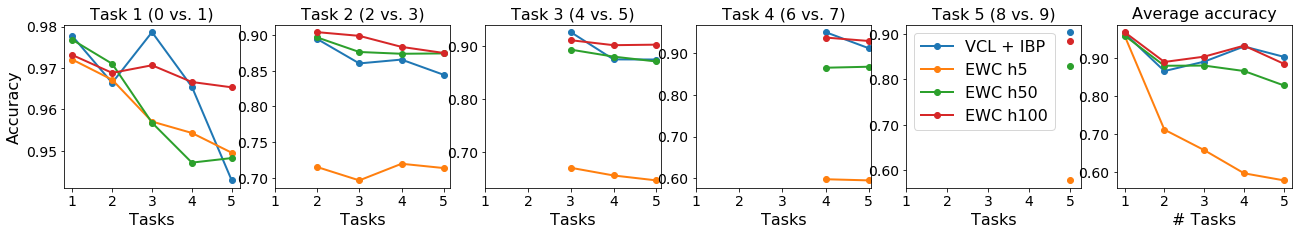

In [70]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

titles = {0: "Task 1 (0 vs. 1)",
          1: "Task 2 (2 vs. 3)",
          2: "Task 3 (4 vs. 5)",
          3: "Task 4 (6 vs. 7)",
          4: "Task 5 (8 vs. 9)"}
no_tasks=5
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_ibp[:, i]))+1, _ibp[:, i], label='VCL + IBP', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_ewc_h5[:, i]))+1, _ewc_h5[:, i], label='EWC h5', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_ewc_h50[:, i]))+1, _ewc_h50[:, i], label='EWC h50', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_ewc_h100[:, i]))+1, _ewc_h100[:, i], label='EWC h100', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_ibp[:,i])+1))
    ax[i].set_xlabel('Tasks', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 4:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[5].plot(np.arange(len(__ibp))+1, __ibp, label='VCL + IBP', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ewc_h5))+1, __ewc_h5, label='EWC h5', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ewc_h50))+1, __ewc_h50, label='EWC h50', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ewc_h100))+1, __ewc_h100, label='EWC h100', marker='o', linewidth=lw)
ax[5].set_xticks(range(1, len(__ibp)+1))
ax[5].set_title('Average accuracy', fontsize=legend_size)
ax[5].set_xlabel('# Tasks', fontsize=legend_size)
ax[5].tick_params(labelsize=tick_size)
ax[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
#plt.savefig("plots/hibp_vs_ewc_normal_all.pdf", bbox_inches='tight')
fig.show()

In [71]:
print("Overall accuracies IBP : {0} pm {1}".format(np.nanmean(ibp), np.nanmean(np.nanstd(ibp, 0))))
print("Overall accuracies EWC h5: {0} pm {1}".format(np.nanmean(_ewc_h5), np.nanmean(np.nanstd(ewc_h5, 0))))
print("Overall accuracies EWC h50: {0} pm {1}".format(np.nanmean(_ewc_h50), np.nanmean(np.nanstd(ewc_h50, 0))))
print("Overall accuracies EWC h100: {0} pm {1}".format(np.nanmean(_ewc_h100), np.nanmean(np.nanstd(ewc_h100, 0))))

Overall accuracies IBP : 0.9156278702278187 pm 0.012168977335323591
Overall accuracies EWC h5: 0.7591455308012324 pm 0.059853578961375026
Overall accuracies EWC h50: 0.9015238814520394 pm 0.03083760649720409
Overall accuracies EWC h100: 0.9246429233935636 pm 0.014582567885092042


## CL2

In [76]:
with open('../../continual_learning_baselines/outputs/online_ewc_MLP5SL_l1_split_mnistb_cl2.pkl', 'rb') as input_file:
    d_ewc_h5 = pickle.load(input_file)
with open('../../continual_learning_baselines/outputs/online_ewc_MLP50SL_l1_split_mnistb_cl2.pkl', 'rb') as input_file:
    d_ewc_h50 = pickle.load(input_file)
with open('../../continual_learning_baselines/outputs/online_ewc_MLP100SL_l1_split_mnistb_cl2.pkl', 'rb') as input_file:
    d_ewc_h100 = pickle.load(input_file)  

In [77]:
with open('results/split_mnist_res5_ibp_rs_split_background_l1_sh_rs_background.pkl', 'rb') as input_file:
    d_rs = pickle.load(input_file)
d_rs.keys()

dict_keys(['vcl_ibp', 'uncerts_ibp', 'Z', 'opt_params'])

In [78]:
reg = 100.0 # 1.0, 10.0, 100.0
ibp = d_rs['vcl_ibp']
ewc_h5 = d_ewc_h5['accs'][reg] / 100.0
ewc_h50 = d_ewc_h50['accs'][reg] / 100.0
ewc_h100 = d_ewc_h100['accs'][reg] / 100.0
_ewc_h5 = np.mean(d_ewc_h5['accs'][reg], 0) / 100.0
_ewc_h50 = np.mean(d_ewc_h50['accs'][reg], 0) / 100.0
_ewc_h100 = np.mean(d_ewc_h100['accs'][reg], 0) / 100.0
_ibp = np.nanmean(ibp, 0)
__ewc_h5 = np.nanmean(d_ewc_h5['accs'][reg], (0, 1)) / 100.0
__ewc_h50 = np.nanmean(d_ewc_h50['accs'][reg], (0, 1)) / 100.0
__ewc_h100 = np.nanmean(d_ewc_h100['accs'][reg], (0, 1)) / 100.0
__ibp = np.nanmean(ibp, (0,1))

/nfs/home/samuelk/anaconda2/envs/tf-gpu-cuda8/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


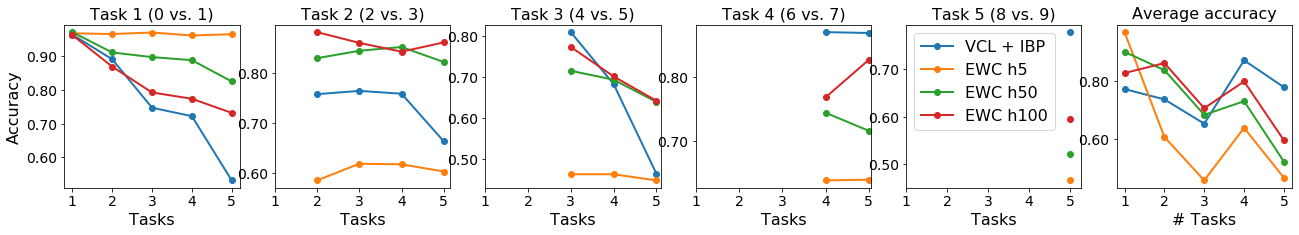

In [79]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

titles = {0: "Task 1 (0 vs. 1)",
          1: "Task 2 (2 vs. 3)",
          2: "Task 3 (4 vs. 5)",
          3: "Task 4 (6 vs. 7)",
          4: "Task 5 (8 vs. 9)"}
no_tasks=5
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_ibp[:, i]))+1, _ibp[:, i], label='VCL + IBP', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_ewc_h5[:, i]))+1, _ewc_h5[:, i], label='EWC h5', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_ewc_h50[:, i]))+1, _ewc_h50[:, i], label='EWC h50', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_ewc_h100[:, i]))+1, _ewc_h100[:, i], label='EWC h100', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_ibp[:,i])+1))
    ax[i].set_xlabel('Tasks', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 4:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[5].plot(np.arange(len(__ibp))+1, __ibp, label='VCL + IBP', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ewc_h5))+1, __ewc_h5, label='EWC h5', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ewc_h50))+1, __ewc_h50, label='EWC h50', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ewc_h100))+1, __ewc_h100, label='EWC h100', marker='o', linewidth=lw)
ax[5].set_xticks(range(1, len(__ibp)+1))
ax[5].set_title('Average accuracy', fontsize=legend_size)
ax[5].set_xlabel('# Tasks', fontsize=legend_size)
ax[5].tick_params(labelsize=tick_size)
ax[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
#plt.savefig("plots/hibp_vs_ewc_normal_all.pdf", bbox_inches='tight')
fig.show()

In [80]:
print("Overall accuracies IBP : {0} pm {1}".format(np.nanmean(ibp), np.nanmean(np.nanstd(ibp, 0))))
print("Overall accuracies EWC h5: {0} pm {1}".format(np.nanmean(_ewc_h5), np.nanmean(np.nanstd(ewc_h5, 0))))
print("Overall accuracies EWC h50: {0} pm {1}".format(np.nanmean(_ewc_h50), np.nanmean(np.nanstd(ewc_h50, 0))))
print("Overall accuracies EWC h100: {0} pm {1}".format(np.nanmean(_ewc_h100), np.nanmean(np.nanstd(ewc_h100, 0))))

Overall accuracies IBP : 0.7517403101880664 pm 0.03245343418493633
Overall accuracies EWC h5: 0.6918428834931538 pm 0.015273379584348833
Overall accuracies EWC h50: 0.791446345898175 pm 0.02684471453045615
Overall accuracies EWC h100: 0.7921831171520259 pm 0.040839141119911625


# Permuted MNIST

## CL1

In [108]:
with open('../../continual_learning_baselines/outputs/online_ewc_MLP5SL_l1_perm_cl1.pkl', 'rb') as input_file:
    d_ewc_h5 = pickle.load(input_file)
with open('../../continual_learning_baselines/outputs/online_ewc_MLP50SL_l1_perm_cl1.pkl', 'rb') as input_file:
    d_ewc_h50 = pickle.load(input_file)
with open('../../continual_learning_baselines/outputs/online_ewc_MLP100SL_l1_perm_cl1.pkl', 'rb') as input_file:
    d_ewc_h100 = pickle.load(input_file)

In [109]:
reg = 500.0 # 1.0, 10.0, 100.0
#ibp = d['vcl_ibp']
ewc_h5 = d_ewc_h5['accs'][reg] / 100.0
ewc_h50 = d_ewc_h50['accs'][reg] / 100.0
ewc_h100 = d_ewc_h100['accs'][reg] / 100.0
_ewc_h5 = np.mean(d_ewc_h5['accs'][reg], 0) / 100.0
_ewc_h50 = np.mean(d_ewc_h50['accs'][reg], 0) / 100.0
_ewc_h100 = np.mean(d_ewc_h100['accs'][reg], 0) / 100.0
#_ibp = np.nanmean(ibp, 0)
__ewc_h5 = np.nanmean(d_ewc_h5['accs'][reg], (0, 1)) / 100.0
__ewc_h50 = np.nanmean(d_ewc_h50['accs'][reg], (0, 1)) / 100.0
__ewc_h100 = np.nanmean(d_ewc_h100['accs'][reg], (0, 1)) / 100.0
#__ibp = np.nanmean(ibp, (0,1))

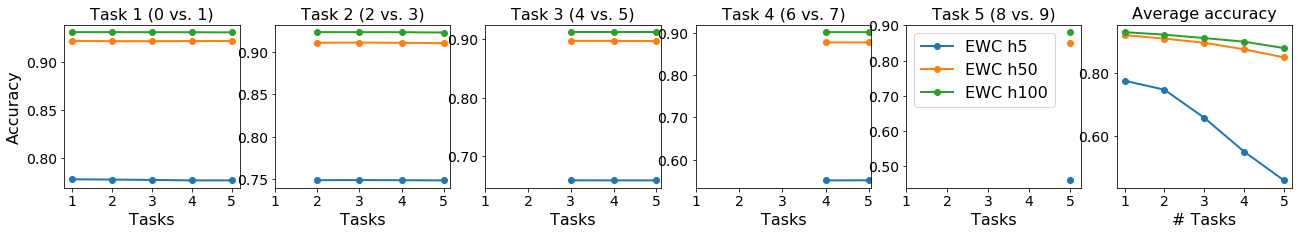

In [110]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

titles = {0: "Task 1 (0 vs. 1)",
          1: "Task 2 (2 vs. 3)",
          2: "Task 3 (4 vs. 5)",
          3: "Task 4 (6 vs. 7)",
          4: "Task 5 (8 vs. 9)"}
no_tasks=5
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
for i in range(no_tasks):
    #ax[i].plot(np.arange(len(_ibp[:, i]))+1, _ibp[:, i], label='VCL + IBP', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_ewc_h5[:, i]))+1, _ewc_h5[:, i], label='EWC h5', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_ewc_h50[:, i]))+1, _ewc_h50[:, i], label='EWC h50', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_ewc_h100[:, i]))+1, _ewc_h100[:, i], label='EWC h100', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_ibp[:,i])+1))
    ax[i].set_xlabel('Tasks', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 4:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
#ax[5].plot(np.arange(len(__ibp))+1, __ibp, label='VCL + IBP', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ewc_h5))+1, __ewc_h5, label='EWC h5', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ewc_h50))+1, __ewc_h50, label='EWC h50', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ewc_h100))+1, __ewc_h100, label='EWC h100', marker='o', linewidth=lw)
ax[5].set_xticks(range(1, len(__ibp)+1))
ax[5].set_title('Average accuracy', fontsize=legend_size)
ax[5].set_xlabel('# Tasks', fontsize=legend_size)
ax[5].tick_params(labelsize=tick_size)
ax[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
#plt.savefig("plots/hibp_vs_ewc_normal_all.pdf", bbox_inches='tight')
fig.show()

In [111]:
#print("Overall accuracies IBP : {0} pm {1}".format(np.nanmean(ibp), np.nanmean(np.nanstd(ibp, 0))))
print("Overall accuracies EWC h5: {0} pm {1}".format(np.nanmean(_ewc_h5), np.nanmean(np.nanstd(ewc_h5, 0))))
print("Overall accuracies EWC h50: {0} pm {1}".format(np.nanmean(_ewc_h50), np.nanmean(np.nanstd(ewc_h50, 0))))
print("Overall accuracies EWC h100: {0} pm {1}".format(np.nanmean(_ewc_h100), np.nanmean(np.nanstd(ewc_h100, 0))))

Overall accuracies EWC h5: 0.6943746666666667 pm 0.030231975473654377
Overall accuracies EWC h50: 0.903416 pm 0.0023099120301782166
Overall accuracies EWC h100: 0.918072 pm 0.002289135400381959


## CL2

In [112]:
with open('../../continual_learning_baselines/outputs/online_ewc_MLP5SL_l1_perm_cl2.pkl', 'rb') as input_file:
    d_ewc_h5 = pickle.load(input_file)
with open('../../continual_learning_baselines/outputs/online_ewc_MLP50SL_l1_perm_cl2.pkl', 'rb') as input_file:
    d_ewc_h50 = pickle.load(input_file)
with open('../../continual_learning_baselines/outputs/online_ewc_MLP100SL_l1_perm_cl2.pkl', 'rb') as input_file:
    d_ewc_h100 = pickle.load(input_file)

In [113]:
reg = 250 # 1.0, 10.0, 100.0
#ibp = d['vcl_ibp']
ewc_h5 = d_ewc_h5['accs'][reg] / 100.0
ewc_h50 = d_ewc_h50['accs'][reg] / 100.0
ewc_h100 = d_ewc_h100['accs'][reg] / 100.0
_ewc_h5 = np.mean(d_ewc_h5['accs'][reg], 0) / 100.0
_ewc_h50 = np.mean(d_ewc_h50['accs'][reg], 0) / 100.0
_ewc_h100 = np.mean(d_ewc_h100['accs'][reg], 0) / 100.0
#_ibp = np.nanmean(ibp, 0)
__ewc_h5 = np.nanmean(d_ewc_h5['accs'][reg], (0, 1)) / 100.0
__ewc_h50 = np.nanmean(d_ewc_h50['accs'][reg], (0, 1)) / 100.0
__ewc_h100 = np.nanmean(d_ewc_h100['accs'][reg], (0, 1)) / 100.0
#__ibp = np.nanmean(ibp, (0,1))

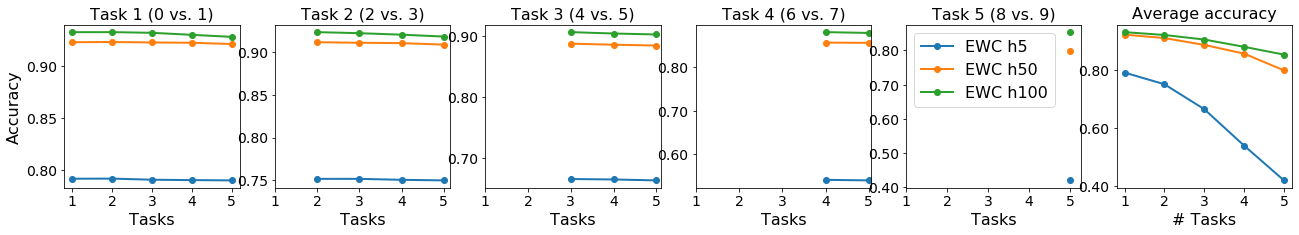

In [114]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

titles = {0: "Task 1 (0 vs. 1)",
          1: "Task 2 (2 vs. 3)",
          2: "Task 3 (4 vs. 5)",
          3: "Task 4 (6 vs. 7)",
          4: "Task 5 (8 vs. 9)"}
no_tasks=5
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
for i in range(no_tasks):
    #ax[i].plot(np.arange(len(_ibp[:, i]))+1, _ibp[:, i], label='VCL + IBP', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_ewc_h5[:, i]))+1, _ewc_h5[:, i], label='EWC h5', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_ewc_h50[:, i]))+1, _ewc_h50[:, i], label='EWC h50', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_ewc_h100[:, i]))+1, _ewc_h100[:, i], label='EWC h100', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_ibp[:,i])+1))
    ax[i].set_xlabel('Tasks', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 4:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
#ax[5].plot(np.arange(len(__ibp))+1, __ibp, label='VCL + IBP', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ewc_h5))+1, __ewc_h5, label='EWC h5', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ewc_h50))+1, __ewc_h50, label='EWC h50', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ewc_h100))+1, __ewc_h100, label='EWC h100', marker='o', linewidth=lw)
ax[5].set_xticks(range(1, len(__ibp)+1))
ax[5].set_title('Average accuracy', fontsize=legend_size)
ax[5].set_xlabel('# Tasks', fontsize=legend_size)
ax[5].tick_params(labelsize=tick_size)
ax[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
#plt.savefig("plots/hibp_vs_ewc_normal_all.pdf", bbox_inches='tight')
fig.show()

In [115]:
#print("Overall accuracies IBP : {0} pm {1}".format(np.nanmean(ibp), np.nanmean(np.nanstd(ibp, 0))))
print("Overall accuracies EWC h5: {0} pm {1}".format(np.nanmean(_ewc_h5), np.nanmean(np.nanstd(ewc_h5, 0))))
print("Overall accuracies EWC h50: {0} pm {1}".format(np.nanmean(_ewc_h50), np.nanmean(np.nanstd(ewc_h50, 0))))
print("Overall accuracies EWC h100: {0} pm {1}".format(np.nanmean(_ewc_h100), np.nanmean(np.nanstd(ewc_h100, 0))))

Overall accuracies EWC h5: 0.6971146666666667 pm 0.02613537897940064
Overall accuracies EWC h50: 0.89464 pm 0.0025795878755159236
Overall accuracies EWC h100: 0.9107133333333334 pm 0.002396412056106052


# CL3

In [2]:
with open('../../continual_learning_baselines/outputs/online_ewc_MLP5_cl3.pkl', 'rb') as input_file:
    d_ewc_h5 = pickle.load(input_file)
with open('../../continual_learning_baselines/outputs/online_ewc_MLP50_cl3.pkl', 'rb') as input_file:
    d_ewc_h50 = pickle.load(input_file)
with open('../../continual_learning_baselines/outputs/online_ewc_MLP100_cl3.pkl', 'rb') as input_file:
    d_ewc_h100 = pickle.load(input_file)

In [5]:
reg = 100.0 # 1.0, 10.0, 100.0
ewc_h5 = d_ewc_h5['accs'][reg] / 100.0
ewc_h50 = d_ewc_h50['accs'][reg] / 100.0
ewc_h100 = d_ewc_h100['accs'][reg] / 100.0
_ewc_h5 = np.mean(d_ewc_h5['accs'][reg], 0) / 100.0
_ewc_h50 = np.mean(d_ewc_h50['accs'][reg], 0) / 100.0
_ewc_h100 = np.mean(d_ewc_h100['accs'][reg], 0) / 100.0
__ewc_h5 = np.nanmean(d_ewc_h5['accs'][reg], (0, 1)) / 100.0
__ewc_h50 = np.nanmean(d_ewc_h50['accs'][reg], (0, 1)) / 100.0
__ewc_h100 = np.nanmean(d_ewc_h100['accs'][reg], (0, 1)) / 100.0

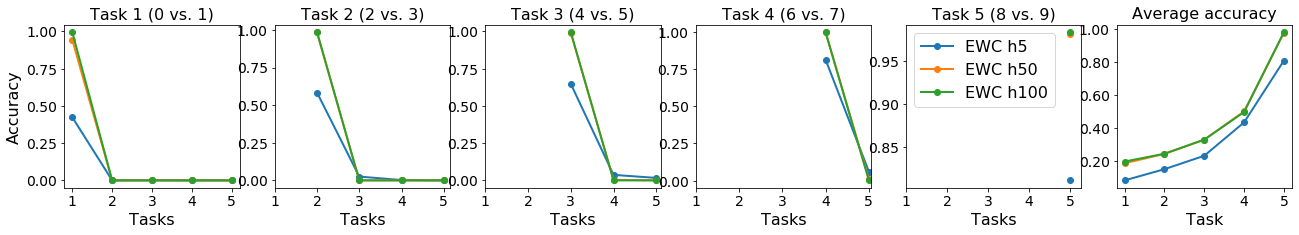

In [8]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

titles = {0: "Task 1 (0 vs. 1)",
          1: "Task 2 (2 vs. 3)",
          2: "Task 3 (4 vs. 5)",
          3: "Task 4 (6 vs. 7)",
          4: "Task 5 (8 vs. 9)"}
no_tasks=5
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
for i in range(no_tasks):
    #ax[i].plot(np.arange(len(_hibp_acc[:, i]))+1, _hibp_acc[:, i], label='VCL + H-IBP', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_ewc_h5[:, i]))+1, _ewc_h5[:, i], label='EWC h5', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_ewc_h50[:, i]))+1, _ewc_h50[:, i], label='EWC h50', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_ewc_h100[:, i]))+1, _ewc_h100[:, i], label='EWC h100', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_ewc_h5[:,i])+1))
    ax[i].set_xlabel('Tasks', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 4:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
#ax[5].plot(np.arange(len(__hibp_acc))+1, __hibp_acc, label='VCL + H-IBP', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ewc_h5))+1, __ewc_h5, label='EWC h5', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ewc_h50))+1, __ewc_h50, label='EWC h50', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ewc_h100))+1, __ewc_h100, label='EWC h100', marker='o', linewidth=lw)
ax[5].set_xticks(range(1, len(__ewc_h5)+1))
ax[5].set_title('Average accuracy', fontsize=legend_size)
ax[5].set_xlabel('Task', fontsize=legend_size)
ax[5].tick_params(labelsize=tick_size)
ax[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
#plt.savefig("plots/hibp_vs_ewc_normal_all.pdf", bbox_inches='tight')
fig.show()

In [9]:
print("Overall accuracies EWC h5: {0} pm {1}".format(np.nanmean(_ewc_h5), np.nanmean(np.nanstd(ewc_h5, 0))))
print("Overall accuracies EWC h50: {0} pm {1}".format(np.nanmean(_ewc_h50), np.nanmean(np.nanstd(ewc_h50, 0))))
print("Overall accuracies EWC h100: {0} pm {1}".format(np.nanmean(_ewc_h100), np.nanmean(np.nanstd(ewc_h100, 0))))

Overall accuracies EWC h5: 0.22818736521778368 pm 0.12466824435998677
Overall accuracies EWC h50: 0.3272156374430425 pm 0.011102488093968
Overall accuracies EWC h100: 0.33052912196229667 pm 0.0011053494934111475


/nfs/home/samuelk/anaconda2/envs/py36/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1628: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
